In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

In [2]:
car_avg_df = pd.read_pickle('car_avg_stats_df.pkl')

In [3]:
def calc_passer_rating(row):
    comp_p = (row['Cmp'] / row['Att'] - .3) * 5
    pyd_p = (row['Pass_Yds'] / row['Att'] - 3) * .25
    td_p = (row['TD'] / row['Att']) * 20
    int_p = 2.375 - (row['Int'] / row['Att']) * 25
    return sum([comp_p, pyd_p, td_p, int_p]) / 6

car_avg_df['YTD_Rating'] = car_avg_df.apply(calc_passer_rating, axis=1)

In [4]:
car_avg_df.describe(include='all')

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,...,FY_TD,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp,YTD_Rating
count,288,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2010.121528,77.131944,76.763889,47.288194,128.288194,1616.118056,2586.357639,18890.559028,69.190972,...,25.468750,20.158416,32.710213,1.534064,235.231304,0.884233,1.986605,0.591766,5.454861,0.876546
std,NaN,5.575190,61.521447,61.378927,41.088969,117.276514,1382.152757,2158.283009,16123.427136,59.844470,...,7.425288,2.421771,3.200167,0.340734,28.819727,0.214644,0.483042,0.121147,4.204450,0.087301
min,NaN,1992.000000,13.000000,13.000000,3.000000,9.000000,184.000000,295.000000,1869.000000,4.000000,...,9.000000,12.266667,21.071429,0.600000,124.600000,0.250000,1.062500,0.187500,1.000000,0.590090
25%,NaN,2007.000000,30.000000,30.000000,14.000000,38.750000,580.250000,937.500000,6556.500000,24.750000,...,20.000000,18.720089,31.191168,1.312500,217.518237,0.741935,1.666667,0.508681,2.000000,0.833159
50%,NaN,2011.000000,62.000000,61.500000,33.000000,87.500000,1190.000000,1969.000000,13946.500000,51.000000,...,26.000000,20.446023,33.155141,1.562500,235.555239,0.875000,1.934267,0.606850,4.000000,0.875281
75%,NaN,2015.000000,110.000000,109.250000,66.000000,178.250000,2225.500000,3642.500000,26076.750000,96.250000,...,31.000000,21.603516,34.415658,1.750000,255.669077,1.033211,2.270313,0.673257,8.000000,0.947258


In [5]:
car_avg_df['qb_tier']=pd.qcut(car_avg_df['YTD_Rating'], 2, labels=False)

In [11]:
tier1_qb = car_avg_df[car_avg_df['qb_tier'] == 1]
tier1_qb

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,...,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp,YTD_Rating,qb_tier
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,...,21.312500,33.500000,1.750000,252.375000,0.812500,2.125000,0.375000,1,0.937966,1
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,...,21.593750,33.656250,1.812500,264.750000,0.625000,2.625000,0.531250,2,0.985395,1
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,...,21.340426,33.021277,1.829787,263.702128,0.659574,2.446809,0.574468,3,0.993610,1
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,...,21.709677,33.129032,2.112903,274.790323,0.596774,2.435484,0.661290,4,1.050065,1
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,...,22.012821,33.410256,2.179487,273.487179,0.576923,2.589744,0.666667,5,1.056456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Tony Romo,2011,61,61,40,119,1304,2042,16326,52,...,21.377049,33.475410,1.950820,267.639344,0.852459,1.868852,0.655738,5,0.974270,1
352,Tony Romo,2012,77,77,48,147,1729,2690,21229,71,...,22.454545,34.935065,1.909091,275.701299,0.922078,1.948052,0.623377,6,0.957466,1
353,Tony Romo,2013,92,92,56,178,2071,3225,25057,81,...,22.510870,35.054348,1.934783,272.358696,0.880435,2.010870,0.608696,7,0.959037,1
356,Tyrod Taylor,2015,14,14,7,20,242,380,3035,6,...,17.285714,27.142857,1.428571,216.785714,0.428571,2.571429,0.500000,1,0.993969,1


In [7]:
tier2_qb = car_avg_df[car_avg_df['qb_tier'] != 1]

In [8]:
car_avg_stats = ['Year','FY_TD','G','Career W %','Cmp/gm','Att/gm','TD/gm','Pass_Yds/gm','Int/gm','Sk/gm', 'Yrs Xp', 'qb_tier']

In [17]:
car_avg_graph_df = car_avg_df[car_avg_stats]
car_avg_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 359
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         288 non-null    int64  
 1   FY_TD        288 non-null    float64
 2   G            288 non-null    int64  
 3   Career W %   288 non-null    float64
 4   Cmp/gm       288 non-null    float64
 5   Att/gm       288 non-null    float64
 6   TD/gm        288 non-null    float64
 7   Pass_Yds/gm  288 non-null    float64
 8   Int/gm       288 non-null    float64
 9   Sk/gm        288 non-null    float64
 10  Yrs Xp       288 non-null    int64  
 11  qb_tier      288 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 29.2 KB


## QB tier analysis

In [12]:
tier1_graph_df = tier1_qb[car_avg_stats]
tier2_graph_df = tier2_qb[car_avg_stats]

In [13]:
tier1_graph_df.describe(include='all')

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,qb_tier
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0
mean,2011.875000,27.763889,92.326389,0.639560,21.030169,32.896032,1.727221,248.672243,0.790113,1.921000,6.368056,1.0
std,4.724397,7.550285,63.042757,0.096633,2.289199,3.318129,0.268804,24.895215,0.180491,0.495623,4.351266,0.0
min,1996.000000,13.000000,14.000000,0.375000,14.000000,21.071429,1.000000,187.214286,0.250000,1.062500,1.000000,1.0
25%,2009.000000,22.000000,41.000000,0.585583,19.644827,31.163043,1.564939,231.222656,0.683849,1.545573,3.000000,1.0
50%,2012.000000,27.000000,79.500000,0.649351,21.301411,33.377204,1.716518,250.599848,0.821241,1.823300,6.000000,1.0
75%,2016.000000,32.000000,129.750000,0.689789,22.313243,34.892959,1.906250,264.586234,0.929187,2.250000,10.000000,1.0
max,2018.000000,55.000000,255.000000,1.000000,26.750000,43.437500,3.125000,318.562500,1.187500,3.875000,18.000000,1.0


In [14]:
tier2_graph_df.describe(include='all')

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,qb_tier
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0
mean,2008.368056,23.173611,61.937500,0.543972,19.286663,32.524393,1.340907,221.790366,0.978353,2.052210,4.541667,0.0
std,5.819844,6.560456,56.186156,0.124568,2.236067,3.078025,0.292600,26.140877,0.205057,0.462580,3.855565,0.0
min,1992.000000,9.000000,13.000000,0.187500,12.266667,23.800000,0.600000,124.600000,0.437500,1.125000,1.000000,0.0
25%,2004.000000,19.000000,29.000000,0.465741,18.386476,31.262500,1.125000,207.316106,0.818359,1.716360,2.000000,0.0
50%,2009.000000,23.000000,46.000000,0.557334,19.660156,32.887500,1.367188,225.037130,1.000000,2.026511,3.000000,0.0
75%,2013.000000,27.250000,77.250000,0.629877,20.834591,34.200512,1.552083,238.402323,1.125000,2.287861,7.000000,0.0
max,2018.000000,40.000000,287.000000,0.812500,25.562500,42.166667,1.875000,305.312500,1.750000,3.928571,18.000000,0.0


# Significance testing

**Should I do significance tests between categories to choose the add_deviation_features?**

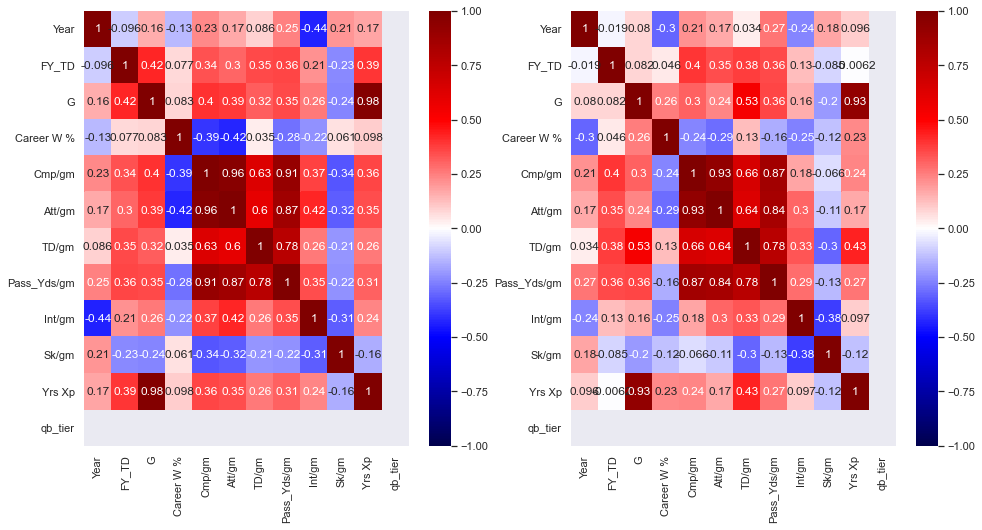

In [15]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(1,2,1)
ax1 = sns.heatmap(tier1_graph_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)
#plt.xlabel('Completions/gm')

fig.add_subplot(1,2,2)
ax2 = sns.heatmap(tier2_graph_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

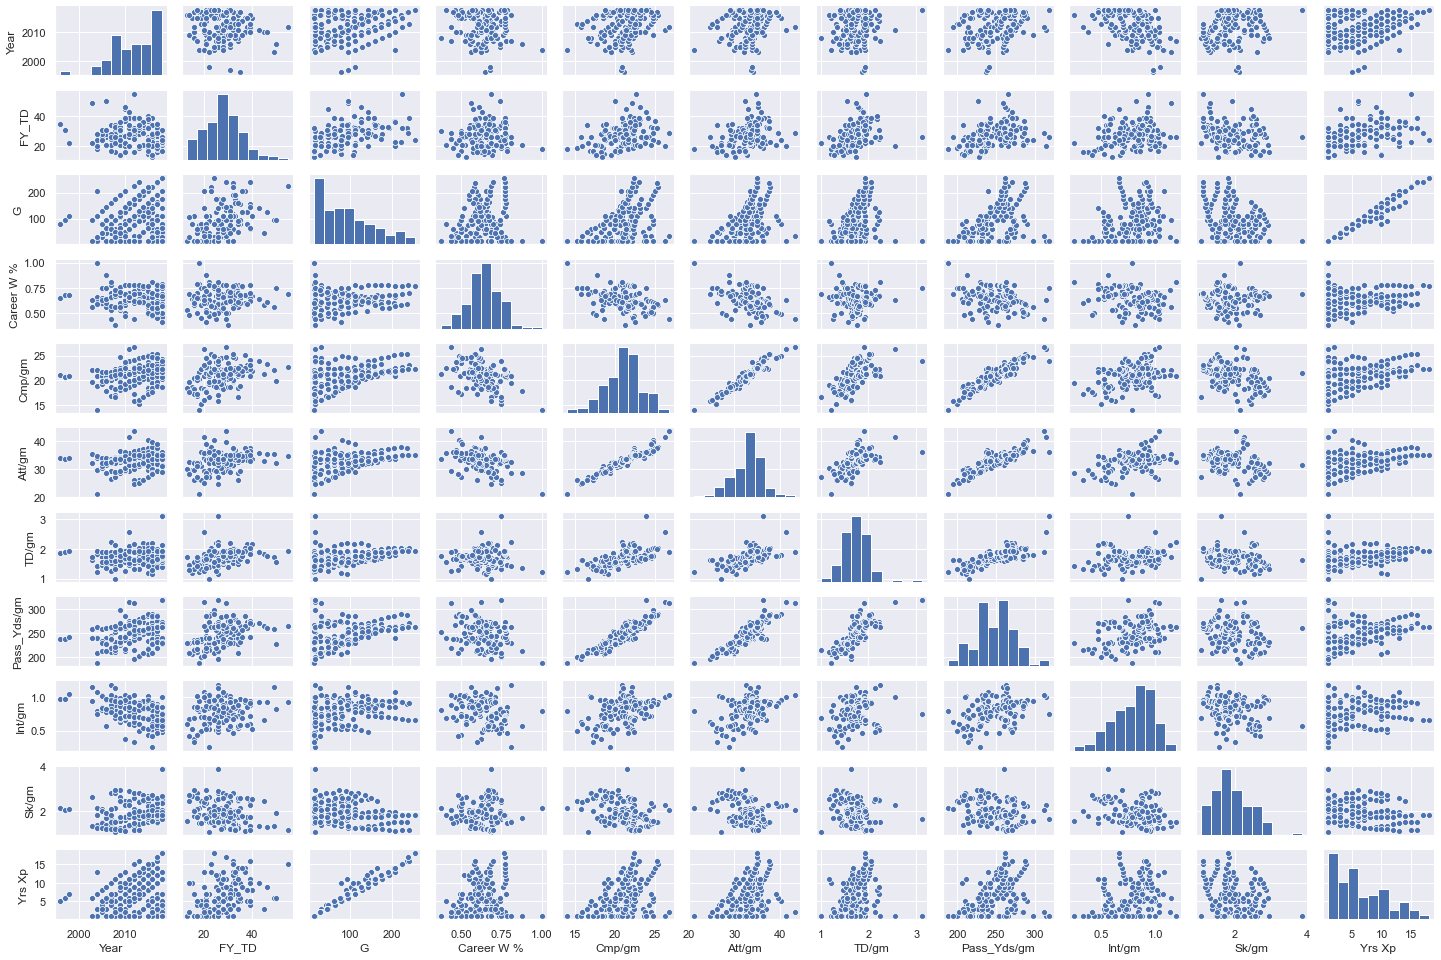

In [50]:
sns.pairplot(tier1_graph_df, height=1.2, aspect=1.5)

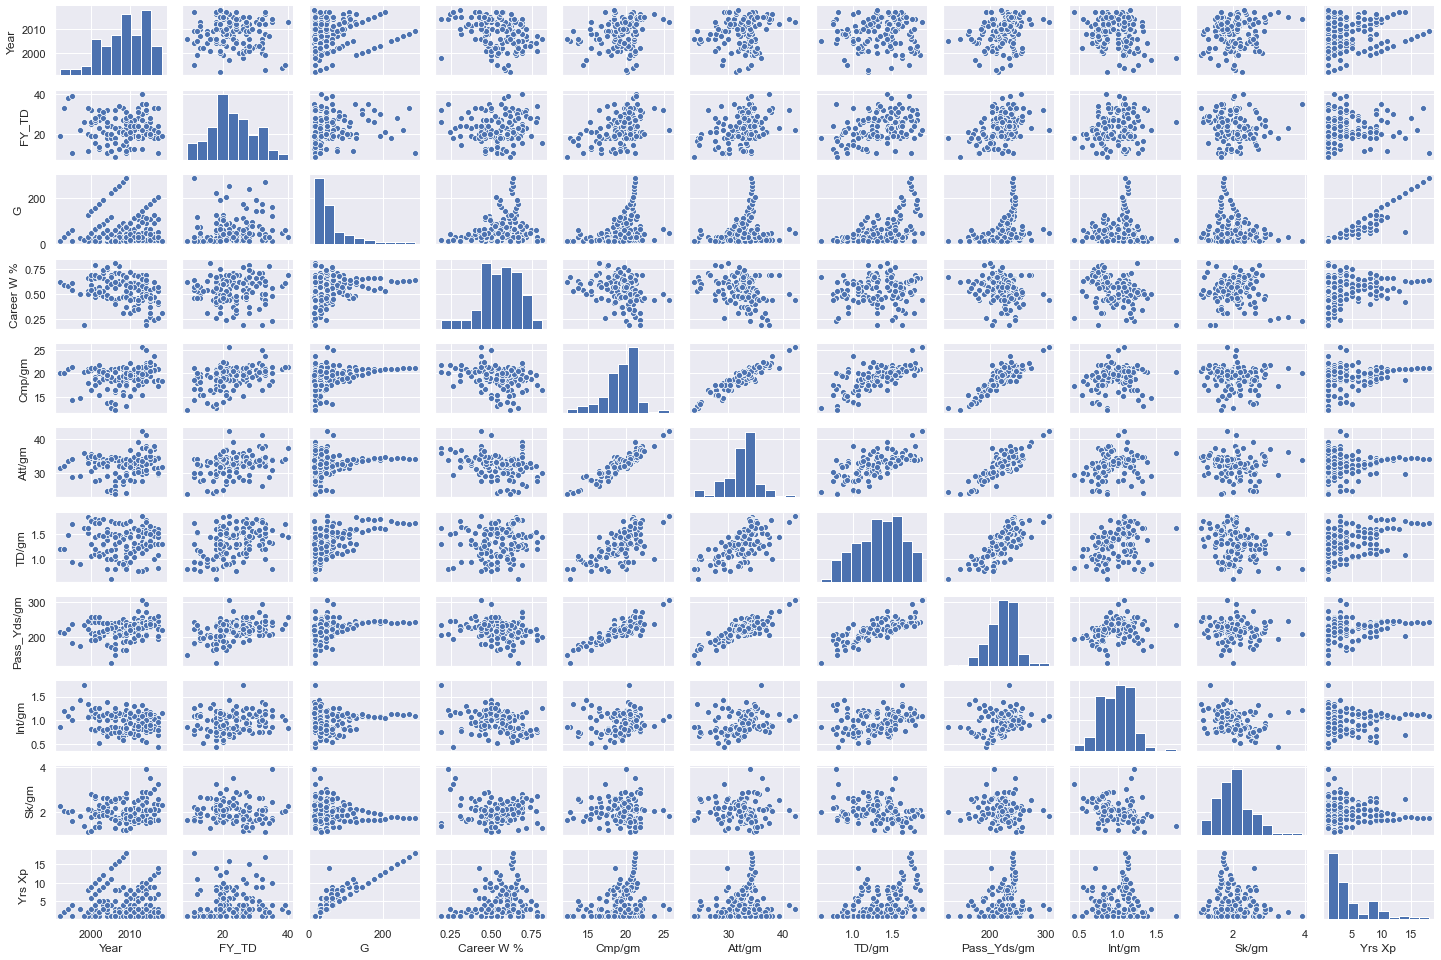

In [51]:
sns.pairplot(tier2_graph_df, height=1.2, aspect=1.5)

## Test Set thinking
2018 is the test set to compare to 2019 actual performance.


In [18]:
car_avg_graph_df.head()

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,qb_tier
0,2008,30.0,16,0.375000,21.312500,33.500000,1.750000,252.375000,0.812500,2.125000,1,1
1,2009,28.0,32,0.531250,21.593750,33.656250,1.812500,264.750000,0.625000,2.625000,2,1
2,2010,45.0,47,0.574468,21.340426,33.021277,1.829787,263.702128,0.659574,2.446809,3,1
3,2011,39.0,62,0.661290,21.709677,33.129032,2.112903,274.790323,0.596774,2.435484,4,1
4,2012,38.0,78,0.666667,22.012821,33.410256,2.179487,273.487179,0.576923,2.589744,5,1


In [181]:
test_df_2018 = car_avg_graph_df[car_avg_graph_df['Year'] == 2018]
train_val_df = car_avg_graph_df[car_avg_graph_df['Year'] < 2018].copy()

# Preliminary feature engineering

In [182]:
train_val_df.head()

,Year,FY_TD,G,Career W %,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Yrs Xp,qb_tier
0,2008,30.0,16,0.375000,21.312500,33.500000,1.750000,252.375000,0.812500,2.125000,1,1
1,2009,28.0,32,0.531250,21.593750,33.656250,1.812500,264.750000,0.625000,2.625000,2,1
2,2010,45.0,47,0.574468,21.340426,33.021277,1.829787,263.702128,0.659574,2.446809,3,1
3,2011,39.0,62,0.661290,21.709677,33.129032,2.112903,274.790323,0.596774,2.435484,4,1
4,2012,38.0,78,0.666667,22.012821,33.410256,2.179487,273.487179,0.576923,2.589744,5,1


In [74]:
# train_val_df['G-log'] = np.log(train_val_df['G'])

In [75]:
# log transfrom of years experience made it worse
#train_val_df['XP-log'] = np.log(train_val_df['Yrs Xp'])

In [183]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [184]:
add_deviation_feature(train_val_df, 'TD/gm', 'qb_tier')

# Working with non-test set

## Create model in sm and perform LR Assumption / residual checks

In [185]:
# log-transformed FY TD
X = train_val_df.drop(['FY_TD', 'G','Yrs Xp'], axis=1)
y = np.log(train_val_df['FY_TD'])

In [187]:
def stats_model_for_residuals(df, X, y):
    x_for_sm = sm.add_constant(X)
    sm_linear_all = sm.OLS(y, X).fit()
    
    df['predict']=sm_linear_all.predict(X)
    df['resid']= y-df['predict']
    with sns.axes_style('white'):
        plot = df.plot(
            kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))
    return df
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


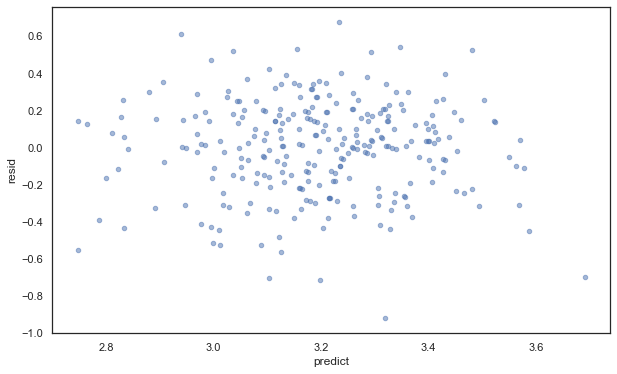

In [188]:
df_with_residuals = stats_model_for_residuals(train_val_df, X, y)

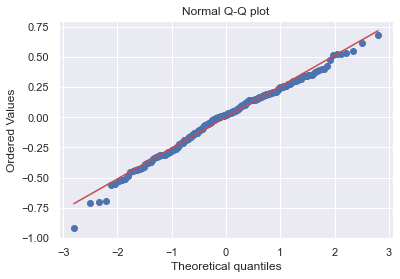

In [189]:
import scipy.stats as stats
stats.probplot(df_with_residuals['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [190]:
X.head()

,Year,Career W %,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,qb_tier,TD/gm_Dev_qb_tier
0,2008,0.375000,21.312500,33.500000,1.750000,252.375000,0.812500,2.125000,1,0.150112
1,2009,0.531250,21.593750,33.656250,1.812500,264.750000,0.625000,2.625000,1,0.403519
2,2010,0.574468,21.340426,33.021277,1.829787,263.702128,0.659574,2.446809,1,0.473610
3,2011,0.661290,21.709677,33.129032,2.112903,274.790323,0.596774,2.435484,1,1.621509
4,2012,0.666667,22.012821,33.410256,2.179487,273.487179,0.576923,2.589744,1,1.891475


# Linear Regression Modeling

# Cross Validation

In [287]:
def split_and_CV(X, y):
    X, y = np.array(X), np.array(y)
    kf = KFold(n_splits=4, shuffle=True)
    cv_lm_r2 = []
    cv_ridge_r2 = []
    cv_lm_MSE = []
    
    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]
        
        # Linear model
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        cv_lm_r2.append(lr_model.score(X_val, y_val))
        val_pred = lr_model.predict(X_val)
        MSE_man = sum((np.exp(y_val) - np.exp(val_pred))**2)/len(y_val)
        cv_lm_MSE.append(MSE_man)

        # Ridge model
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        lm_ridge = Ridge(alpha=.1)
        lm_ridge.fit(X_train_scaled, y_train)
        cv_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    print(f'R^2 LM reg: {cv_lm_r2}')
    print(f'LM reg mean cv R^2: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
    print(f'MSE: {cv_lm_MSE}')
    print(f'MSE simple mean: {np.mean(cv_lm_MSE)}\n')

    print(f'R^2 Ridge: {cv_ridge_r2}')
    print(f'LM ridge mean cv R^2: {np.mean(cv_ridge_r2):.3f} +- {np.std(cv_ridge_r2):.3f}\n')

In [288]:
split_and_CV(X,y)

R^2 LM reg: [0.30179678141879307, 0.4241429751786454, 0.06786729066400587, 0.19104634739692306]
LM reg mean cv R^2: 0.246 +- 0.132
MSE: [36.73923795754448, 33.045964044485366, 43.54420511018481, 56.07669538202202]
MSE simple mean: 42.35152562355917

R^2 Ridge: [0.2976396754527665, 0.44462586910966106, 0.042725208836573936, 0.19332681725759404]
LM ridge mean cv R^2: 0.245 +- 0.147



In [241]:
from sklearn.metrics import mean_squared_error

# Feature Engineering (without Cross Validation)

In [277]:
# polynomial regression

def poly_add(X,y):
    cv_poly_r2 = []
    cv_ridge_r2 = []
    
    X['PY/G^2'] = X['Pass_Yds/gm'] ** 2
    X['Cmp/G^2'] = X['Cmp/gm'] ** 2
    X['TD/gm^2'] = X['TD/gm'] ** 2
    
    X, y = np.array(X), np.array(y)   
    
    kf = KFold(n_splits=4, shuffle=True)

    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        poly_model = LinearRegression()
        poly_model.fit(X_train, y_train)
        cv_poly_r2.append(poly_model.score(X_val, y_val))
        
        # Ridge model
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        lm_ridge = Ridge(alpha=.1)
        lm_ridge.fit(X_train_scaled, y_train)
        cv_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    print(f'R^2 Poly: {cv_poly_r2}')
    print(f'Poly mean cv R^2: {np.mean(cv_poly_r2):.3f} +- {np.std(cv_poly_r2):.3f}\n')
    
    print(f'R^2 Ridge: {cv_ridge_r2}')
    print(f'LM ridge mean cv R^2: {np.mean(cv_ridge_r2):.3f} +- {np.std(cv_ridge_r2):.3f}')

In [278]:
poly_add(X,y)

R^2 Poly: [0.034952428652573864, 0.3037232735578713, 0.2919565021559528, 0.28030131102617684]
Poly mean cv R^2: 0.228 +- 0.112

R^2 Ridge: [0.05391221684471703, 0.3126581873148647, 0.2743243768010114, 0.27491301140815805]
LM ridge mean cv R^2: 0.229 +- 0.102


In [ ]:
# Apply lasso to simplify model
def lasso_test(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=10)

    reg_scaler = StandardScaler()
    reg_scaler.fit(X_train.values)
    x_tr = reg_scaler.transform(X_train.values)
    alphavec = 10**np.linspace(-2,2,50)

    lasso_model = LassoCV(alphas=alphavec, cv=4)
    lasso_model.fit(x_tr, y_train)
    print(f'Selected Alpha: {lasso_model.alpha_}')
    print(list(zip(X_train.columns, lasso_model.coef_)))
    xVal_tr = reg_scaler.transform(X_val.values)
    print(f'Lasso R^2: {lasso_model.score(xVal_tr,y_val)}')
    
    

In [ ]:
lasso_test(x_poly,y)

# Looking at a random prediction

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(X,y,size)